<h1> Комментарий ревьюера </h1>

Привет, Илья!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

<a id='step1'></a>

# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div style="border:solid green 2px; padding: 20px">
    
### Основная цель:<a class="tocSkip">        

    
  Необходимо  __защитить данные__ клиентов страховой компании __«Хоть потоп»__. __Разработать__ такой метод __преобразования данных__, чтобы по ним было __сложно восстановить__ персональную __информацию__. Обосновать корректность его работы.
Нужно __защитить данные__, чтобы при __преобразовании__ качество моделей машинного обучения __не ухудшилось__.
__Подбирать__ наилучшую модель __не требуется__.  
    
    
 
### Задачи  проекта:<a class="tocSkip">

- 1 __Подготовить данные__<br>
    
- 2 __Ответить  на вопрос и обосновать решение__<br>
  2.1. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.) <br>
   - __a__. __Изменится.__ Приведите примеры матриц.
   - __b__. __Не изменится.__ Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    
- 3 __Предложить алгоритм__ преобразования данных для __решения задачи__. __Обосновать__, почему качество линейной регрессии __не поменяется__.
    
- 4 Запрограммировать этот алгоритм, применив __матричные__ операции. __Проверить__, что качество __линейной регрессии__ из sklearn не __отличается__ до и после __преобразования__. Примените метрику __R2__. 

</div>

<div style="border:solid green 2px; padding: 20px">
    
  


   
### Набор данных находится в файле:<a class="tocSkip">
- `datasets/insurance.csv` — исходный датасет.

   
    
### Описание данных <a class="tocSkip"> 
 
- __Признаки:__ пол, возраст и зарплата застрахованного, количество членов его семьи.
- __Целевой признак:__ количество страховых выплат клиенту за последние 5 лет.  


</div>

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display

from sklearn.linear_model import LinearRegression #Импортирую модель LinearRegression из библиотеки sklearn
from sklearn.metrics import r2_score #Импортирую метрику r2_score из библиотеки sklearn
from sklearn.model_selection import train_test_split #Импортирую функцию train_test_split из библиотеки sklearn

%matplotlib inline

import seaborn as sn # подключение графической библиотеки seaborn
import matplotlib.pyplot as plt #импортируем библиотеку для графиков matplotlib 


import warnings
warnings.simplefilter('ignore')# отменяет вывод таблицы предупреждения ошибки

## Загрузка данных
[&#10224;](#step1)

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)# вывод без экспонентациальных форм и лишних запятых.
pd.set_option('display.max_columns', None) # вывод всех колонок датасета без урезания.

try: #конструкция try-except помогает выбрать работающий путь к исследуемым файлам
    df = pd.read_csv('/data_set/insurance.csv')#  /Работа - Локально/
   
except:
    df = pd.read_csv('/datasets/insurance.csv')# /Работа - сервер Яндекс/
   

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Все библиотеки импортированы и данные загружены, можем двигаться дальше!
</div>


__Общая информация о полученных данных__

In [3]:
l = [df]# с помощью цикла пройдемся по исследуемому датасету,выведем результаты  проверок.
for i in l:
    object_featur = i.shape[0:2]
    columns = ['строк',  'столбцов'] #Объеденим полученные результаты в таблицу
    object_featur = pd.DataFrame([object_featur], columns = columns)
    display("Общая информация по датафрейму:",object_featur,i.head(3),print("________________________________"))
    display(print("Типы данных:"),i.info())# смотрим на типы даннх
    display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
    # код ниже находит и оформляет в таблицу пропущенные значения
    report = i.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
    display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

________________________________


'Общая информация по датафрейму:'

,строк,столбцов
0,5000,5


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0


None

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

None

'Количество обнаруженных дубликатов:'

153

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,Пол,0,0.00
1,Возраст,0,0.00
2,Зарплата,0,0.00
3,Члены семьи,0,0.00
4,Страховые выплаты,0,0.00


__Удалим 153 обнаруженных дубликата.__

__Методом df.drop_duplicates() удаляем дубликаты при помощи .reset_index(drop=True) создаем новую индексацию.__ 

In [4]:
df = df.drop_duplicates().reset_index(drop=True) 

In [5]:
df.duplicated().sum()# смотрим результат после применения метода .drop_duplicates()

0

__Сменим формат в столбце  `Возраст`  c float64 на  int64__ 

In [6]:
df['Возраст'] = df['Возраст'].astype('int64')# методом .astype() для столбца Возраст устан формат int64 

 <div style="border:solid green 2px; padding: 20px">

**Вывод** 
На данном  этапе, проведена загрузка данных, изучена общая информация.
<br>Для __анализа данных__ и __построения моделей__, предоставлен датасет содержащий информацию __о клиентах__ страховой компании __«Хоть потоп»__. Датасет состоит из **5** столбцов (__признаки__)  и **5000** строк(__объектов наблюдения__). Пропуски в данных отсутствуют,но были обнаружены __153__ строки дубликаты (удалены методом __drop_duplicates()__ и заменен формат в столбце __"Возраст"__ с вещественного __float__ на целочисленный __int__. Также можно было переименовать названия столбцов, убрав пропуски между слов, и изменив кирилицу на латиницу. Иных преобразований не требуется.


**Для обучения модели были выделены следующие признаки:**   
<br>**Общие признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
<br>**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

В полученном для исследования датасете, были  **произведены** необходимые преобразования. Данные готовы для **посторения моделей** машинного обучения  и **проверки утверждения**
    , что при __преобразовании__ __-__ качество моделей машинного обучения **не ухудшится**.    
    
   
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Отлично!
    
Этого не было в требованиях к проекту, просто дополнительно по EDA:
    
Если использовать функцию describe(), то можно увидеть, что в таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане. 
    
Дополнительно можно было бы посмотреть корреляцию. Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.651. Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.
</div>


In [7]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"4,847.00","4,847.00","4,847.00","4,847.00","4,847.00"
mean,0.50,31.02,"39,895.81",1.20,0.15
std,0.50,8.49,"9,972.95",1.10,0.47
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,200.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


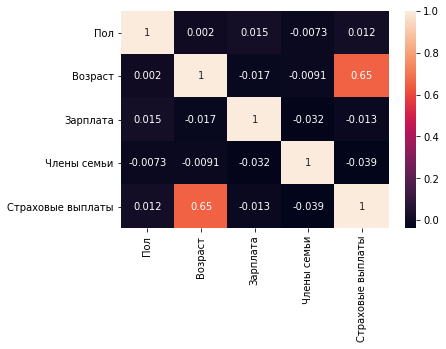

In [8]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b><br> 
    Да, всё так. Инструкция по выполнению проекта - сдерживает своей строгостью. Держал себя изо всех рук, чтоб чего лишнего не выдать. Но предыдущие уроки, о том, что данные должны быть  хорошо предобработаны, не смотря ни на что, всегда в приоритете.) 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Да, Eda всегда должен быть в любом проекте =)
</div>

## Умножение матриц
[&#10224;](#step1)

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Обоснование:** 

 <div style="border:solid green 2px; padding: 20px">
 
    
    
    

Известно, что для линейной регрессии верны следующие выражения:

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножим матрицу признаков X на обратимую матрицу P:

$$
a' = (XP)w'
$$


$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Одно из войств транспонированных матриц: Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке.

$$
(AB)^T = B^T A^T 
$$

Одно из войств обратимых квадратных матриц: Матрица обратная произведению обратимых квадратных матриц равна произведению обратных матриц, взятых в обратном порядке.
$$
(AB)^{-1} = B^{-1} A^{-1} 
$$

Следовательно:

$$
w' = (P^T X^T XP)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (P^T)^{-1} (X^T X)^{-1} P^T X^T y
$$
Поскольку:
$$
(P^T)^{-1} P^T = E 
$$
Получаем:
$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$
$$
w' = P^{-1} w
$$

$$
a' = (XP)P^{-1} w
$$
$$
a' = Xw = a
$$
Качество модели не изменится.   
    
    
 </div>   


    

**Ответ:** При умножении признаков на обратимую матрицу. Качество линейной регрессии не изменится.


   


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно, молодец, что не раскрыл $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует. 
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b><br> 
Да, это есть в теории.     
</div>

## Алгоритм преобразования
[&#10224;](#step1)

**Алгоритм**

1. Выделим признаки и целевой признак;
2. Генерируем квадратную матрицу по количеству признаков, в нашем случае (4, 4);
3. Генерируем обратную матрицу, если код не падает, следовательно исходная матрица обратимая;
4. Выделяем матрицу из признаков;
5. Умножаем матрицу признаков на обратимую матрицу;
6. Создаем таблицу из преобразованной матрицы;
7. Исходный и преобразованный датасеты, разделяем на обучающую и тестовую выборки;
8. Обучаем модель линейной регресии для исходного датасета, вычисляем метрку R2;
9. Обучаем модель линейной регресии для преобразованного датасета, вычисляем метрку R2;
10. Проверяем равенство метрик R2 для созданных моделей.

**Обоснование**

На этапе **№ 2** вывели, что если **преобразовать** исходный датасет, умножив его на **обратимую квадратную матрицу**, то качество модели, **после преобразования** датасета, **не изменится**. На следующем шаге, **проверим полученное утверждение**, при помощи **создания моделей**  (алгоритм Линейная регрессия) обученные **до преобразования** и __после__. Сравним результаты моделей, __метрику R2__ между собой.

## Проверка алгоритма
[&#10224;](#step1)

In [9]:
features = df.drop('Страховые выплаты', axis=1) # Выделим общие признаки
target = df['Страховые выплаты'] # Выделим  целевой признак

# Сгенерируем квадратную матрицу размером по количеству признаков
quadratic_matrix = np.random.normal(0, 0.1, size=(features.shape[1], features.shape[1]))
print(quadratic_matrix) # Печатаем квадратную матрицу  

# Сгенерируем обратную матрицу. Исходную матрицу, можно считать обратимой, если не падает код(выполняется преобразование). 
inverse_matrix = np.linalg.inv(quadratic_matrix) 
display(features.head()) # Посмотрим на  признаки
display(target.head()) # Печать целевой признак

[[-0.00243061 -0.15837773  0.04722398 -0.07632195]
 [-0.09792515  0.02576016  0.15003787  0.02797398]
 [ 0.05913157 -0.13391697  0.06459483 -0.13989759]
 [-0.19919486 -0.00696059  0.1192422   0.11325692]]


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,"49,600.00",1
1,0,46,"38,000.00",1
2,0,29,"21,000.00",0
3,0,21,"41,700.00",2
4,1,28,"26,100.00",0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

In [10]:
feature_matrix = features.values #Выделим матрицу из признаков


matrix = feature_matrix.dot(quadratic_matrix) #Умножим  матрицу признаков на обратимую матрицу

print(matrix.shape) #Проверим размер преобразованной матрицы

(4847, 4)


In [11]:
transformed_matrix = pd.DataFrame(matrix, columns = features.columns) # Датафрейм из преобразованной матрицы
display(transformed_matrix.head()) # Печать transformed_matrix
transformed_matrix.info() # Смотрим общую информацию о преобразованном датасете

,Пол,Возраст,Зарплата,Члены семьи
0,"2,928.71","-6,641.39","3,210.22","-6,937.74"
1,"2,242.30","-5,087.67","2,461.62","-5,314.71"
2,"1,238.92","-2,811.51","1,360.84","-2,937.04"
3,"2,463.33","-5,583.81","2,696.99","-5,832.92"
4,"1,540.59","-3,494.67","1,690.17","-3,650.62"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Пол          4847 non-null   float64
 1   Возраст      4847 non-null   float64
 2   Зарплата     4847 non-null   float64
 3   Члены семьи  4847 non-null   float64
dtypes: float64(4)
memory usage: 151.6 KB


In [12]:
# Исходный и преобразованный датасеты, разделим  на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.35, random_state=42)
transformed_features_train, transformed_features_test, target_train, target_test = train_test_split(transformed_matrix, target,\
                                                        test_size=0.35, random_state=42)

In [13]:
# Обучаем модель линейной регресии для исходного датасета, получаем метрку R2
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2 = round(r2_score(target_test, predictions), 8)
print(r2)

0.43692433


In [14]:
# Обучаем модель линейной регресии для преобразованного датасета, получаем метрку R2
transformed_model = LinearRegression()
transformed_model.fit(transformed_features_train, target_train)
transformed_predictions = transformed_model.predict(transformed_features_test)
transformed_r2 =  round(r2_score(target_test, transformed_predictions), 8)
print(transformed_r2)

0.43692433


In [15]:
# Сравниваем полученные метрики R2 в исходном и  преобразованном датасетах
if r2 == transformed_r2:
    print('Качество модели, после преобразования, не изменилось!')
else:
    print('Утверждение, что качество модели не изменилось, не подтверждается.')

Качество модели, после преобразования, не изменилось!


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно, таким образом в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не потеряв в качестве модели. 
</div>



## Общий вывод
[&#10224;](#step1)


 <div style="border:solid green 2px; padding: 20px">

В страховой компании __«Хоть потоп»__, возникла необходимость __разработать__ такой метод преобразования  данных, чтобы по ним было __сложно восстановить персональную__ информацию клиентов. Также, было поставленно __требование__, что при этом преобразовании, __качество модели__ машинного обучения __не должно__ ухудшиться.<br>     
Для __анализа данных__ и __построения моделей__, страховой компанией __"Хоть потоп"__, был предоставлен датасет содержащий информацию __о клиентах__  . Датасет состоит из **5** столбцов (__признаки__)  и **5000** строк(__объектов наблюдения__). Пропуски в данных обнаруженны не были,но были найдены __153__ строки дубликаты (удалены методом __drop_duplicates()__. Был  заменен формат в столбце __"Возраст"__ с вещественного __float__ на целочисленный __int__. 
    
На этапе **Умножение матриц** было выведено и обоснованно, что если **преобразовать** исходный датасет, умножив его на **обратимую квадратную матрицу**, то качество модели, **после преобразования** датасета, **не изменится**.  $$a' = Xw = a$$        

 На следующем шаге, **проверим полученное утверждение**, при помощи **создания моделей**  (алгоритм Линейная регрессия) обученные **до преобразования** и __после__. Сравним результаты моделей, __метрику R2__ между собой.
    
Затем составили __Алгоритм преобразования__ и далее, на следующем шаге __Проверка алгоритма__, проверили полученное утверждение, при помощи **создания моделей**  (алгоритм Линейная регрессия) обученные **до преобразования** и __после__. Сравнили результаты моделей, __метрику R2__ между собой. 
    
<br>Проделанный эесперимент __показал__, что   метрики для обоих моделей - __равны__(__R2__ до преобразования __0.43692433__ = __0.43692433 R2__ после преобразования ), следовательно __качество__ предсказаний __не изменится__, в тоже самое время, личные данные клиентов, теперь более надежно защищены.
   
 Были выполнены поставленные страховой компанией __"Хоть потоп"__ требования.
    
**Задача проекта:**  Был __разработан__ метод преобразования данных, __усложняющий восстановление__ персональных данных.

**Цель проекта:**  Данные были __защищены__, при этом, произведенные преобразования  __не ухудшают__   качество модели машинного обучения.





   
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу, ты демонстрируешь отличное владение материалом спринта.
    
Отправляю обратно, чтобы ты мог прочитать мои комментарии и задать какие-то вопросы, может хочешь какую-то подборку статей.   

Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
   
Примеры использования линейной алгебры в машинном обучении:
https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
    
Для чего нужна математика в машинном обучении?
https://proglib.io/p/dlya-chego-nuzhen-matematicheskiy-analiz-v-mashinnom-obuchenii-2021-02-15

Большая статья по векторам:
https://neptune.ai/blog/understanding-vectors-from-a-machine-learning-perspective  
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b><br> 
   Спасибо за материал. Предварительно ознакомился. Математика и линейная алгебра в частности -  суть, фундамент ML.   Безусловно криптография сильно коррелирует с машинным обучение, так как  задачи очень схожи и глубоко погружены в математику. 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Удачи в будущих проектах и работе =)
</div>

## Чек-лист проверки
[&#10224;](#step1)

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

#    <br>[**В начало**](#step1)